In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:



# default sizes for plotting

plt.rc('font', size=13)
plt.rc('axes', labelsize=13, titlesize=13)
plt.rc('legend', fontsize=13)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)


## get the data 

Load and have a look at the daata

### load the data

In [3]:
file_path = './cancer-risk-factors.csv'

# Load the dataset using a try-except block to handle potential file errors
try:
    cancer_risk_factors = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"ERROR: No such file: {file_path}")

### take a look at the data strcture

In [4]:
cancer_risk_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

In [5]:
cancer_risk_factors.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [6]:
# check categories in non-numerical features
cancer_risk_factors['Patient_ID'].value_counts()

Patient_ID
LU0000    1
PR0129    1
PR0142    1
PR0141    1
PR0140    1
         ..
BR0261    1
BR0260    1
BR0259    1
BR0258    1
ST0399    1
Name: count, Length: 2000, dtype: int64

In [7]:
cancer_risk_factors['Cancer_Type'].value_counts()

Cancer_Type
Lung        527
Breast      460
Colon       418
Prostate    305
Skin        290
Name: count, dtype: int64

In [8]:
cancer_risk_factors['Risk_Level'].value_counts()

Risk_Level
Medium    1574
Low        324
High       102
Name: count, dtype: int64

In [9]:
cancer_risk_factors.describe()

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,63.248000,0.489000,5.157000,5.035000,5.967500,0.194500,5.189500,4.563500,4.927500,4.015000,5.323000,4.979000,0.032500,0.19650,3.94050,0.454449,26.183350,4.938500
std,10.462946,0.500004,3.325339,3.260996,3.061393,0.395914,3.154452,3.088323,3.045305,2.978458,3.207462,3.212899,0.177368,0.39745,3.04887,0.123074,3.947459,3.166027
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.029285,15.000000,0.000000
25%,56.000000,0.000000,2.000000,2.000000,4.000000,0.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,0.00000,1.00000,0.366982,23.500000,2.000000
50%,64.000000,0.000000,5.000000,5.000000,6.000000,0.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,0.000000,0.00000,4.00000,0.455399,26.200000,5.000000
75%,70.000000,1.000000,8.000000,8.000000,9.000000,0.000000,8.000000,7.000000,8.000000,6.000000,8.000000,8.000000,0.000000,0.00000,6.00000,0.539782,28.700000,8.000000
max,90.000000,1.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,10.00000,0.852158,41.400000,10.000000


#### visualize the data - plot as histograms

In [10]:
# handy function to save plots inspired by homl3 exercise 2 

In [11]:
img_path = './images/cancer-risk/'

In [12]:
if not os.path.exists(img_path):
    ! mkdir $img_path

In [13]:
def save_figs(name, fig_extension='png', resolution=200, img_path=img_path):
    path = img_path + f'{name}.{fig_extension}'
    plt.savefig(path, format=fig_extension, dpi=resolution)

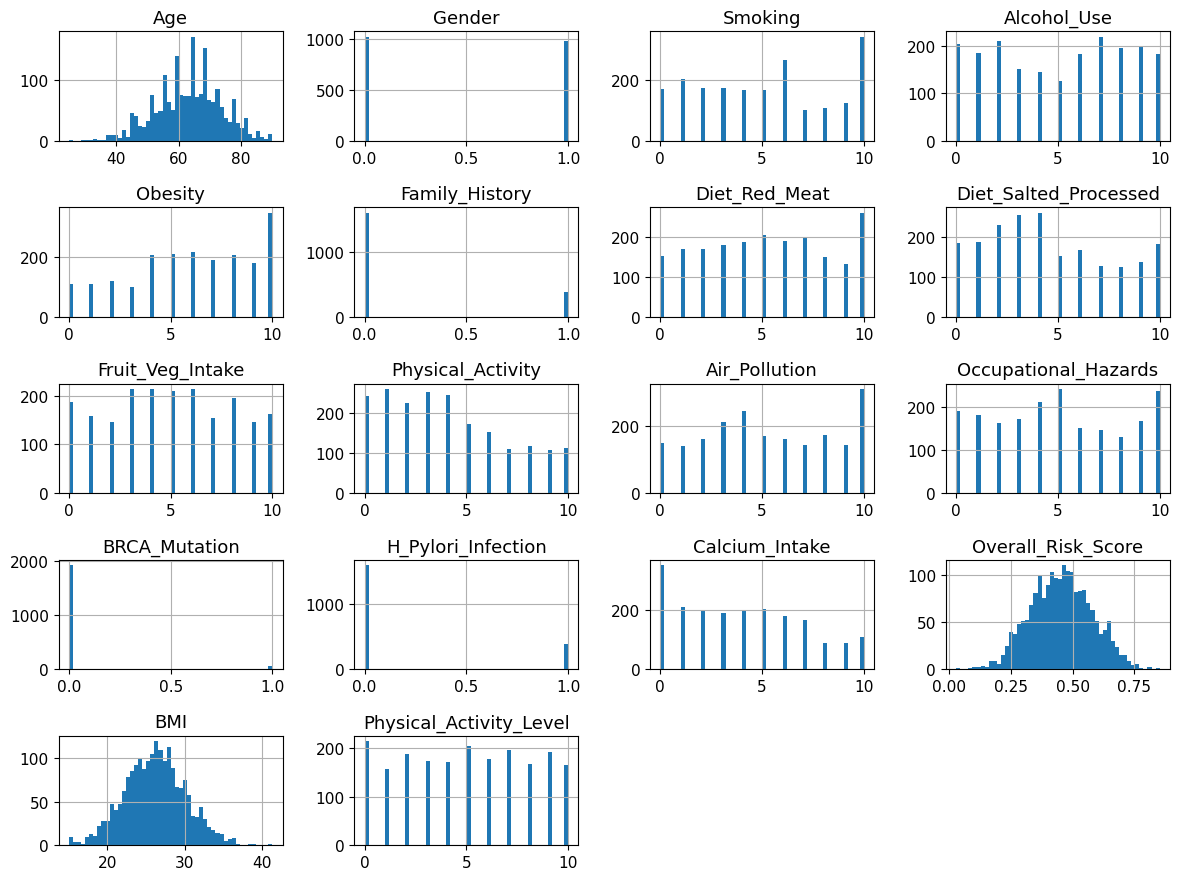

In [14]:
cancer_risk_factors.hist(bins=50, figsize=(12, 9)) # only plots numerical attributes
plt.tight_layout()
save_figs("attribute_histogram_plots")
plt.show()

### create a test set

In [14]:
# random seed to ensure results stay the same 
np.random.seed(42)

Data set large enough relative to number pf features to rely on random sampling methods for splitting data?
First try random sampling

In [15]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cancer_risk_factors, test_size=0.2, random_state=42)

In [16]:
train_set['Obesity'].describe()

count    1600.000000
mean        5.987500
std         3.080913
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        10.000000
Name: Obesity, dtype: float64

In [17]:
cancer_risk_factors['Obesity'].describe()

count    2000.000000
mean        5.967500
std         3.061393
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        10.000000
Name: Obesity, dtype: float64

In [18]:
(train_set['Gender'] == 1).sum()

776

In [19]:
(cancer_risk_factors['Gender'] == 1).sum()


978

In [20]:
(train_set['Smoking'] == 1).sum()

155

In [21]:
(cancer_risk_factors['Smoking'] == 1).sum()


204

In [22]:
(train_set['BRCA_Mutation'] == 1).sum()

49

In [23]:
(cancer_risk_factors['BRCA_Mutation'] == 1).sum()


65

In [24]:
train_set['Air_Pollution'].describe()

count    1600.000000
mean        5.343750
std         3.226584
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Air_Pollution, dtype: float64

In [25]:
cancer_risk_factors['Air_Pollution'].describe()

count    2000.000000
mean        5.323000
std         3.207462
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Air_Pollution, dtype: float64

<Axes: >

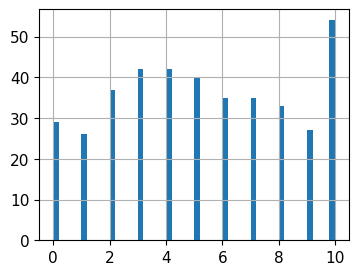

In [26]:
test_set['Air_Pollution'].hist(bins=50, figsize=(4, 3))

<Axes: >

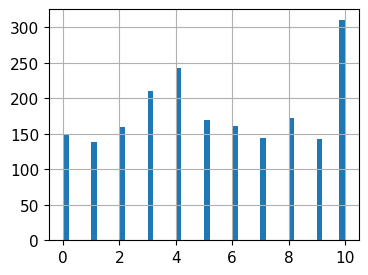

In [27]:
cancer_risk_factors['Air_Pollution'].hist(bins=50, figsize=(4, 3))

Try stratified method for comparison - with air pollution, this seems to be somewhat correlated

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(cancer_risk_factors, cancer_risk_factors['Air_Pollution']):
    strat_train_set_n = cancer_risk_factors.iloc[train_index]
    strat_test_set_n = cancer_risk_factors.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [106]:
train_set_strat, test_set_strat = strat_splits[0]

In [107]:
train_set_strat['Air_Pollution'].describe()

count    1280.000000
mean        5.324219
std         3.207016
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Air_Pollution, dtype: float64

<Axes: >

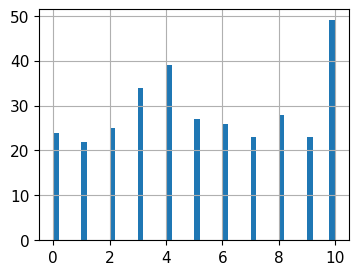

In [108]:
test_set_strat['Air_Pollution'].hist(bins=50, figsize=(4, 3))

## Explore and visualize the data more exentensivly to gain insights

In [109]:
cancer_risk_factors = train_set_strat.copy()

In [110]:
cancer_risk_factors

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level,balanced_lifesyle_score
216,LU0216,Breast,60,0,0,0,4,1,7,4,...,6,4,0,0,7,0.346212,22.9,9,Medium,0.2125
867,CO0067,Lung,67,1,6,6,4,0,5,7,...,7,8,0,0,7,0.522460,27.3,3,Medium,0.5875
1693,ST0093,Lung,65,1,10,6,6,0,7,8,...,10,1,0,1,4,0.562107,20.6,2,Medium,0.8125
848,CO0048,Colon,48,1,4,6,5,0,10,2,...,2,10,0,0,6,0.444280,23.4,10,Medium,0.5000
1737,ST0137,Lung,70,0,10,6,7,0,0,7,...,10,1,0,1,1,0.516764,21.7,7,Medium,0.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,BR0220,Lung,42,0,9,5,9,0,0,4,...,6,1,0,0,6,0.452435,22.8,0,Medium,0.6000
1210,PR0010,Breast,70,0,2,2,10,0,6,4,...,1,6,0,1,1,0.399321,21.0,3,Medium,0.4750
401,BR0001,Prostate,46,1,3,10,2,0,8,0,...,0,4,0,0,7,0.392558,23.6,7,Medium,0.4125
951,CO0151,Colon,48,1,1,1,4,0,10,9,...,2,9,0,0,8,0.373639,27.4,0,Medium,0.5500


### looking for correlations

In [111]:
corr_matrix = cancer_risk_factors.corr(numeric_only=True)

In [112]:
corr_matrix

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,balanced_lifesyle_score
Age,1.000000,0.275171,0.037825,-0.042147,-0.015501,0.045078,-0.000699,-0.043284,-0.003609,0.079085,0.023039,0.059403,-0.023610,0.025699,0.071900,-0.014521,-0.010712,-0.054300,-0.027481
Gender,0.275171,1.000000,0.123100,-0.053544,-0.180417,0.010634,0.048290,0.016946,0.012559,0.066066,0.054922,0.058086,-0.092432,-0.004344,0.332682,0.019935,0.025245,-0.023771,-0.030261
Smoking,0.037825,0.123100,1.000000,0.109866,-0.098321,-0.013025,-0.138818,-0.029406,0.041466,0.103850,0.459392,-0.037579,-0.038146,-0.033905,0.087566,0.424260,-0.002081,0.028848,0.262471
Alcohol_Use,-0.042147,-0.053544,0.109866,1.000000,-0.005766,0.004207,-0.017404,-0.021066,0.066181,0.025848,0.067900,0.008370,-0.050028,-0.061802,-0.048998,0.392918,-0.041097,0.033254,0.346436
Obesity,-0.015501,-0.180417,-0.098321,-0.005766,1.000000,0.008848,-0.028852,0.000119,-0.024223,0.003529,-0.056972,-0.005171,0.077044,0.061662,-0.103348,0.247521,0.047544,0.019975,0.295589
Family_History,0.045078,0.010634,-0.013025,0.004207,0.008848,1.000000,-0.004641,-0.013990,0.018425,-0.001249,0.015045,0.052695,0.015588,-0.016651,0.051340,0.053219,0.020463,0.070257,-0.037572
Diet_Red_Meat,-0.000699,0.048290,-0.138818,-0.017404,-0.028852,-0.004641,1.000000,0.171522,-0.199564,0.006648,-0.057098,-0.020223,-0.020539,0.042442,0.062357,0.279776,0.046392,0.034114,0.398884
Diet_Salted_Processed,-0.043284,0.016946,-0.029406,-0.021066,0.000119,-0.013990,0.171522,1.000000,-0.223853,-0.010463,0.060582,0.078109,0.032236,0.123709,0.057206,0.402563,-0.010905,0.010207,0.466042
Fruit_Veg_Intake,-0.003609,0.012559,0.041466,0.066181,-0.024223,0.018425,-0.199564,-0.223853,1.000000,0.002695,-0.052545,-0.053438,-0.045844,-0.156194,-0.019233,-0.155251,0.000613,-0.022188,-0.450378
Physical_Activity,0.079085,0.066066,0.103850,0.025848,0.003529,-0.001249,0.006648,-0.010463,0.002695,1.000000,0.083896,0.013995,-0.012332,-0.018867,0.002313,0.066657,0.009581,0.071523,-0.308656


In [113]:
corr_matrix['Overall_Risk_Score'].sort_values(ascending=False)

Overall_Risk_Score         1.000000
balanced_lifesyle_score    0.636648
Air_Pollution              0.510519
Smoking                    0.424260
Diet_Salted_Processed      0.402563
Alcohol_Use                0.392918
Occupational_Hazards       0.343277
Diet_Red_Meat              0.279776
Obesity                    0.247521
H_Pylori_Infection         0.072833
Physical_Activity          0.066657
Calcium_Intake             0.062268
Physical_Activity_Level    0.057129
Family_History             0.053219
BMI                        0.031430
Gender                     0.019935
BRCA_Mutation              0.004582
Age                       -0.014521
Fruit_Veg_Intake          -0.155251
Name: Overall_Risk_Score, dtype: float64

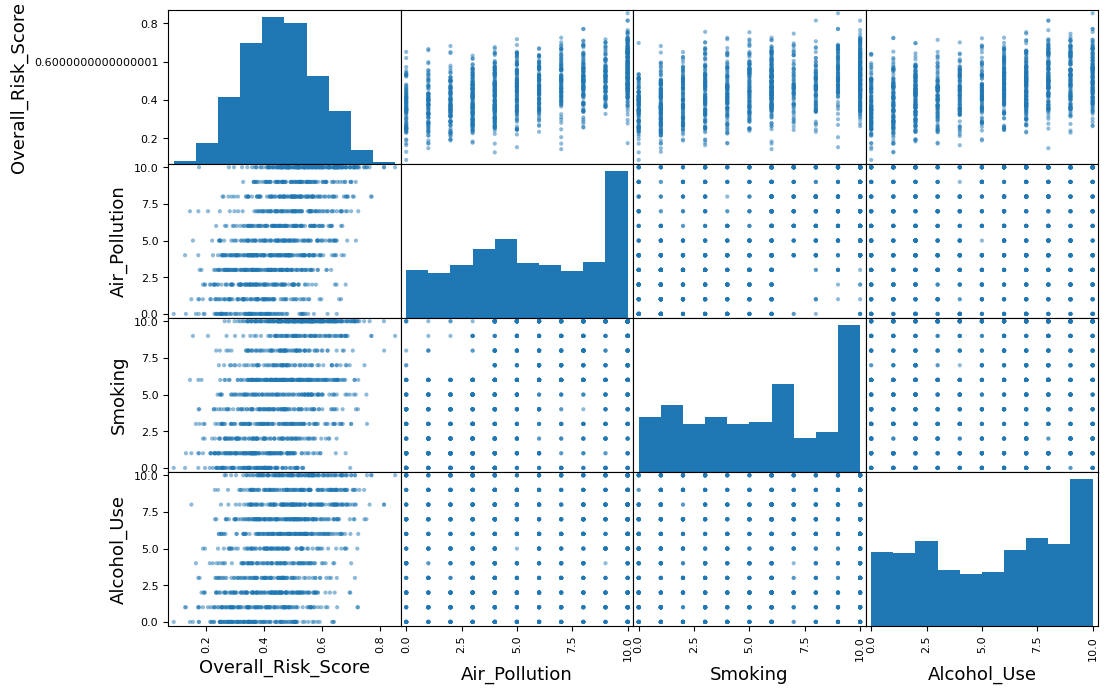

In [114]:
from pandas.plotting import scatter_matrix

attributes = ['Overall_Risk_Score', 'Air_Pollution', 'Smoking', 'Alcohol_Use']
           #   'Occupational_Hazards', 'Diet_Salted_Processed', 'Diet_Red_Meat', 'Obesity']
scatter_matrix(cancer_risk_factors[attributes], figsize= (12, 8))
save_figs('scatter_matrix_plots_corr')


In [115]:
# attributes are not well suited to be displayed as scatter plots

## Experimenting with Attribute Combinations

The following score is made up and more or less subjective based on impressions and experiences from my studies

In [116]:
# goes from low (min  = 0, balanced)  to high (max = 1, less balanced)
cancer_risk_factors['balanced_lifesyle_score'] = (( cancer_risk_factors['Smoking'] + cancer_risk_factors['Alcohol_Use'] 
                                                    + cancer_risk_factors['Diet_Salted_Processed'] + cancer_risk_factors['Obesity'] + cancer_risk_factors['Diet_Red_Meat']))
                                                    #   cancer_risk_factors['Physical_Activity'] + cancer_risk_factors['Physical_Activity_Level'] + cancer_risk_factors['Fruit_Veg_Intake']))
# att =  ['Smoking', 'Alcohol_Use', 'Diet_Salted_Processed', 'Obesity','Diet_Red_Meat']
att =  ['Physical_Activity', 'Physical_Activity_Level', 'Fruit_Veg_Intake']
for a in att:
    cancer_risk_factors['balanced_lifesyle_score'] += (10 - cancer_risk_factors[a])

cancer_risk_factors['balanced_lifesyle_score'] = cancer_risk_factors['balanced_lifesyle_score']  / 80

In [117]:
cancer_risk_factors['balanced_lifesyle_score'].describe()

count    1280.000000
mean        0.527363
std         0.111279
min         0.187500
25%         0.450000
50%         0.525000
75%         0.612500
max         0.862500
Name: balanced_lifesyle_score, dtype: float64

In [118]:
corr_matrix = cancer_risk_factors.corr(numeric_only=True)

In [119]:
corr_matrix

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,balanced_lifesyle_score
Age,1.000000,0.275171,0.037825,-0.042147,-0.015501,0.045078,-0.000699,-0.043284,-0.003609,0.079085,0.023039,0.059403,-0.023610,0.025699,0.071900,-0.014521,-0.010712,-0.054300,-0.027481
Gender,0.275171,1.000000,0.123100,-0.053544,-0.180417,0.010634,0.048290,0.016946,0.012559,0.066066,0.054922,0.058086,-0.092432,-0.004344,0.332682,0.019935,0.025245,-0.023771,-0.030261
Smoking,0.037825,0.123100,1.000000,0.109866,-0.098321,-0.013025,-0.138818,-0.029406,0.041466,0.103850,0.459392,-0.037579,-0.038146,-0.033905,0.087566,0.424260,-0.002081,0.028848,0.262471
Alcohol_Use,-0.042147,-0.053544,0.109866,1.000000,-0.005766,0.004207,-0.017404,-0.021066,0.066181,0.025848,0.067900,0.008370,-0.050028,-0.061802,-0.048998,0.392918,-0.041097,0.033254,0.346436
Obesity,-0.015501,-0.180417,-0.098321,-0.005766,1.000000,0.008848,-0.028852,0.000119,-0.024223,0.003529,-0.056972,-0.005171,0.077044,0.061662,-0.103348,0.247521,0.047544,0.019975,0.295589
Family_History,0.045078,0.010634,-0.013025,0.004207,0.008848,1.000000,-0.004641,-0.013990,0.018425,-0.001249,0.015045,0.052695,0.015588,-0.016651,0.051340,0.053219,0.020463,0.070257,-0.037572
Diet_Red_Meat,-0.000699,0.048290,-0.138818,-0.017404,-0.028852,-0.004641,1.000000,0.171522,-0.199564,0.006648,-0.057098,-0.020223,-0.020539,0.042442,0.062357,0.279776,0.046392,0.034114,0.398884
Diet_Salted_Processed,-0.043284,0.016946,-0.029406,-0.021066,0.000119,-0.013990,0.171522,1.000000,-0.223853,-0.010463,0.060582,0.078109,0.032236,0.123709,0.057206,0.402563,-0.010905,0.010207,0.466042
Fruit_Veg_Intake,-0.003609,0.012559,0.041466,0.066181,-0.024223,0.018425,-0.199564,-0.223853,1.000000,0.002695,-0.052545,-0.053438,-0.045844,-0.156194,-0.019233,-0.155251,0.000613,-0.022188,-0.450378
Physical_Activity,0.079085,0.066066,0.103850,0.025848,0.003529,-0.001249,0.006648,-0.010463,0.002695,1.000000,0.083896,0.013995,-0.012332,-0.018867,0.002313,0.066657,0.009581,0.071523,-0.308656


In [120]:
corr_matrix['Overall_Risk_Score'].sort_values(ascending=False)

Overall_Risk_Score         1.000000
balanced_lifesyle_score    0.636648
Air_Pollution              0.510519
Smoking                    0.424260
Diet_Salted_Processed      0.402563
Alcohol_Use                0.392918
Occupational_Hazards       0.343277
Diet_Red_Meat              0.279776
Obesity                    0.247521
H_Pylori_Infection         0.072833
Physical_Activity          0.066657
Calcium_Intake             0.062268
Physical_Activity_Level    0.057129
Family_History             0.053219
BMI                        0.031430
Gender                     0.019935
BRCA_Mutation              0.004582
Age                       -0.014521
Fruit_Veg_Intake          -0.155251
Name: Overall_Risk_Score, dtype: float64

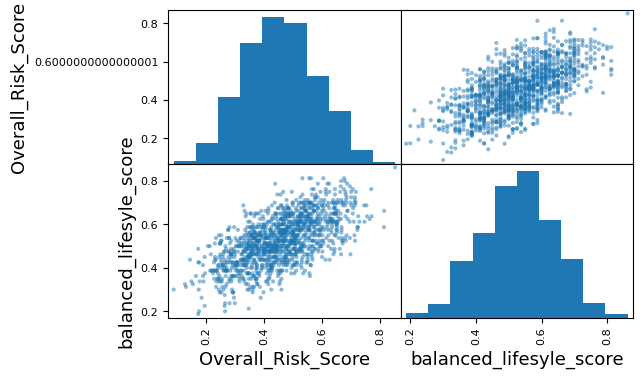

In [121]:
attributes = ['Overall_Risk_Score', 'balanced_lifesyle_score']
scatter_matrix(cancer_risk_factors[attributes], figsize= (6, 4))
save_figs('scatter_matrix_plots_corr2')

This combined attribute illustrates the potential importance of the included features in relation to cancer risk. However, I won’t include this observation in the primary feature preprocessing, since it might be more interesting to examine the importance of the individual attributes. Maybe later, I’ll revisit this as an exercise.

## prepare data for ml algorithm - preprocess

Original training set without the label

target is risk level, overall risk score and cancer type are also related so they are excluded as well. 

In [123]:
cancer_risk_factors = train_set_strat.drop(['Risk_Level', 'Overall_Risk_Score', 'Cancer_Type'], axis=1)
cancer_risk_factors_labels = train_set_strat['Risk_Level'].copy()

In [124]:
cancer_risk_factors.columns


Index(['Patient_ID', 'Age', 'Gender', 'Smoking', 'Alcohol_Use', 'Obesity',
       'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed',
       'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution',
       'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection',
       'Calcium_Intake', 'BMI', 'Physical_Activity_Level',
       'balanced_lifesyle_score'],
      dtype='object')

### data cleaning

In [139]:
cancer_risk_factors.isna().any().sum()

0

In [140]:
cancer_risk_factors.isnull().any().sum()

0

No attributes with NaN or missing vcalues

drop 'Patient_ID', as  patient ID does not hold any useful info in this context

In [141]:
cancer_risk_factors = train_set_strat.drop('Patient_ID', axis=1)